# Timing Tensorflow on GPU vs CPU
In this notebook, we find out how much time a matrix multiplication operation takes on a gpu and the same on a cpu.

In [4]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import time

In [12]:
def get_times(maximum_time):
    
    matrix_sizes = range(500, 50000, 50)
    device_times = {
        "/gpu:0": [],
        "/cpu:0": []
    }
    
    for size in matrix_sizes:
        for device_name in device_times.keys():
            
            shape = (size, size)
            dtype = tf.float16
            with tf.device(device_name):
                r1 = tf.random_uniform(shape, minval=0, maxval=1, dtype=dtype)
                r2 = tf.random_uniform(shape, minval=0, maxval=1, dtype=dtype)
                dot_operation = tf.matmul(r1, r2)
                
            with tf.Session(config=tf.ConfigProto(log_device_placement = True)) as sess:
                start_time = time.time()
                result = sess.run(dot_operation)
                time_taken = time.time() - start_time
                print(result)
                device_times[device_name].append(time_taken)
            
            print(device_times)
            
            if time_taken > maximum_time:
                return device_times, matrix_sizes

In [14]:
device_times, matrix_sizes = get_times(20)

[[121.6  125.9  127.1  ... 121.7  125.2  123.5 ]
 [123.5  122.56 124.94 ... 120.2  127.5  121.44]
 [124.6  121.06 124.3  ... 120.7  120.   120.94]
 ...
 [123.2  123.06 122.94 ... 119.6  122.7  120.1 ]
 [115.06 120.56 114.94 ... 114.8  118.7  114.4 ]
 [120.   123.56 118.8  ... 119.75 120.56 120.3 ]]
{'/gpu:0': [0.01582479476928711], '/cpu:0': []}
[[128.1  121.75 118.75 ... 123.4  121.06 123.9 ]
 [131.1  125.   125.75 ... 131.9  130.6  131.2 ]
 [130.   126.9  125.9  ... 125.4  130.   129.6 ]
 ...
 [127.1  121.5  119.4  ... 122.9  126.25 126.1 ]
 [123.1  123.44 120.   ... 126.2  122.8  124.75]
 [128.5  122.25 123.4  ... 127.   127.5  131.8 ]]
{'/gpu:0': [0.01582479476928711], '/cpu:0': [1.7944378852844238]}
[[131.2 137.8 130.6 ... 127.9 127.4 128.6]
 [132.5 141.6 133.2 ... 134.1 130.  132. ]
 [129.4 137.2 135.8 ... 130.6 128.9 130.6]
 ...
 [132.5 137.2 133.4 ... 132.1 131.1 130.9]
 [131.4 139.5 130.  ... 128.6 128.5 129.8]
 [142.2 147.2 139.6 ... 137.8 131.9 137.9]]
{'/gpu:0': [0.01582479

[[236.6 230.5 234.6 ... 237.5 233.5 235.1]
 [238.4 232.9 236.6 ... 241.  238.2 240.2]
 [239.9 226.  232.8 ... 231.8 236.8 240.1]
 ...
 [244.5 236.5 236.8 ... 237.8 235.9 243.8]
 [239.4 235.  236.8 ... 237.2 233.6 236.2]
 [238.2 225.5 229.6 ... 235.2 238.8 236.2]]
{'/gpu:0': [0.01582479476928711, 0.009211540222167969, 0.010683298110961914, 0.012340545654296875, 0.012939214706420898, 0.01353764533996582, 0.015524148941040039, 0.020112276077270508, 0.018587827682495117, 0.021687030792236328], '/cpu:0': [1.7944378852844238, 2.116156578063965, 2.7713234424591064, 3.467744827270508, 4.315128803253174, 5.275539398193359, 6.377654790878296, 9.874227285385132, 13.564846992492676, 14.549124002456665]}
[[247.6 253.5 236.8 ... 242.9 252.  253. ]
 [247.2 256.5 238.8 ... 243.  253.6 254.4]
 [245.2 249.9 244.4 ... 249.  254.5 256. ]
 ...
 [253.5 258.2 251.8 ... 255.4 259.2 262.8]
 [244.4 251.1 241.8 ... 248.6 249.1 248.9]
 [258.8 263.8 248.1 ... 260.2 270.2 268.8]]
{'/gpu:0': [0.01582479476928711, 0.

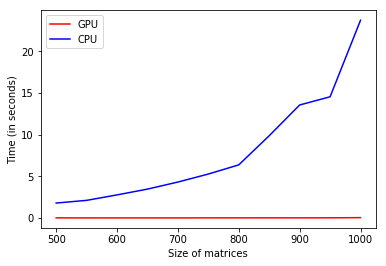

In [20]:
gpu_line = plt.plot(matrix_sizes[:len(device_times["/gpu:0"])], device_times["/gpu:0"], 'r')
cpu_line = plt.plot(matrix_sizes[:len(device_times["/cpu:0"])], device_times["/cpu:0"], 'b')
plt.xlabel('Size of matrices')
plt.ylabel('Time (in seconds)')
plt.legend(['GPU', 'CPU'])
plt.show()